In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
day_ds = pd.read_csv('day_approach_maskedID_timeseries.csv')
day_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nr. sessions                 42766 non-null  float64
 1   total km                     42766 non-null  float64
 2   km Z3-4                      42766 non-null  float64
 3   km Z5-T1-T2                  42766 non-null  float64
 4   km sprinting                 42766 non-null  float64
 5   strength training            42766 non-null  float64
 6   hours alternative            42766 non-null  float64
 7   perceived exertion           42766 non-null  float64
 8   perceived trainingSuccess    42766 non-null  float64
 9   perceived recovery           42766 non-null  float64
 10  nr. sessions.1               42766 non-null  float64
 11  total km.1                   42766 non-null  float64
 12  km Z3-4.1                    42766 non-null  float64
 13  km Z5-T1-T2.1   

In [7]:
day_ds.head(n=20)

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4
5,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,...,0.0,0.0,0.0,1.0,0.08,0.00,0.17,0,0,5
6,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,...,0.0,0.0,0.0,0.0,0.09,0.00,0.18,0,0,6
7,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,7
8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,1.2,0.0,0.0,0.11,0.00,0.18,0,0,8
9,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,9


In [5]:
target_variable = 'injury'

# Compute correlation coefficients
correlation_matrix = day_ds.corr()

# Extract correlation coefficients with the target variable
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)

# Sort the correlation coefficients in descending order
correlation_with_target_sorted = correlation_with_target.abs().sort_values(ascending=False)

# Print the features with high correlation with the target variable
print("Features with high correlation with the target variable:")
correlation_with_target_sorted.head(10)

Features with high correlation with the target variable:


perceived exertion             0.039748
perceived exertion.4           0.037525
perceived exertion.5           0.037154
perceived exertion.2           0.036932
perceived trainingSuccess.4    0.034931
perceived trainingSuccess      0.034880
perceived exertion.6           0.034781
perceived exertion.3           0.033723
perceived trainingSuccess.3    0.032156
perceived recovery.4           0.031308
Name: injury, dtype: float64

In [6]:
week_ds=pd.read_csv('week_approach_maskedID_timeseries.csv')
week_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 72 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   max km one day                                 42798 non-null  float64
 4   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 5   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 6   nr. days with interval session                 42798 non-null  float64
 7   total km Z3-4                                  42798 non-null  float64
 8   max km Z3-4 one day                            42798 non-null  float64
 9   total km Z5-T1-T2                              427

In [7]:
day_ds.describe()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
count,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,...,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000
mean,0.829561,7.038187,0.691381,0.579930,0.073016,0.116237,0.163492,0.247788,0.349802,0.195898,...,0.580347,0.072595,0.116120,0.162308,0.247550,0.349503,0.196224,34.550858,0.013632,1228.039892
std,0.580696,7.473216,2.317657,1.811938,0.483480,0.326010,0.549664,0.257262,0.368300,0.190321,...,1.814538,0.483691,0.326016,0.554031,0.256718,0.368042,0.190568,19.050033,0.115960,807.021168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,20.000000,0.000000,436.000000
50%,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.160000,...,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.170000,34.000000,0.000000,1256.000000
75%,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,50.000000,0.000000,1913.000000
max,2.000000,55.900000,42.200000,48.000000,40.000000,2.000000,10.220000,1.000000,1.000000,1.000000,...,48.000000,40.000000,2.000000,20.000000,1.000000,1.000000,1.000000,73.000000,1.000000,2673.000000


In [8]:
week_ds.describe()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
count,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,...,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,4.279800e+04,4.279800e+04,4.279800e+04,42798.000000
mean,5.809337,1.874667,49.543911,14.009255,9.433621,0.930184,1.672531,4.859398,3.456888,4.063970,...,0.525709,0.255089,0.184927,0.343522,34.538249,0.013435,4.408628e+05,9.014685e+05,4.803623e+05,1227.733422
std,2.484234,1.853287,36.715017,9.071678,8.887120,1.040631,1.263528,6.984670,4.577423,5.645305,...,0.390604,0.153214,0.127996,0.219536,19.020826,0.115130,4.328234e+06,6.945503e+06,4.656806e+06,806.495152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,5.000000,1.000000,22.800000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.150000,0.110000,0.170000,20.000000,0.000000,6.955245e-01,6.723968e-01,6.923077e-01,437.000000
50%,6.000000,1.000000,44.800000,13.400000,8.000000,1.000000,2.000000,0.000000,0.000000,1.500000,...,0.730000,0.220000,0.160000,0.310000,34.000000,0.000000,9.891862e-01,1.001431e+00,9.897523e-01,1254.000000
75%,7.000000,3.000000,70.100000,18.300000,14.600000,2.000000,3.000000,8.000000,6.300000,6.300000,...,0.840000,0.360000,0.240000,0.520000,50.000000,0.000000,1.320515e+00,1.422171e+00,1.327586e+00,1913.000000
max,14.000000,7.000000,242.000000,131.000000,100.000000,6.000000,7.000000,79.800000,75.000000,80.000000,...,1.000000,0.900000,0.900000,1.000000,73.000000,1.000000,2.096000e+08,2.176000e+08,2.096000e+08,2673.000000


<Axes: ylabel='Frequency'>

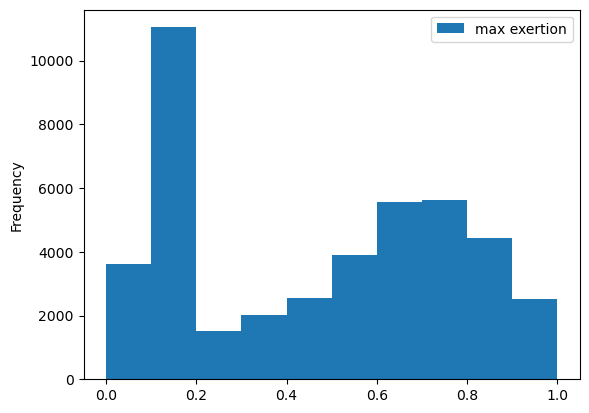

In [12]:
# Scatter plot of two numerical variables
""" plt.figure(figsize=(8, 6))
sns.scatterplot(x='max exertion', y='injury', data=week_ds)
plt.title('Scatter Plot of Two Numerical Columns')
plt.xlabel('max exertion')
plt.ylabel('injury')
plt.show()
 """
week_ds.plot(kind='hist', x='', y='max exertion')

In [15]:
# Compute correlation coefficients
correlation_matrix = week_ds.corr()

# Extract correlation coefficients with the target variable
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)

# Sort the correlation coefficients in descending order
correlation_with_target_sorted = correlation_with_target.abs().sort_values(ascending=False)

# Print the features with high correlation with the target variable
print("Features with high correlation with the target variable:")
correlation_with_target_sorted.head(20)

Features with high correlation with the target variable:


max exertion                0.051565
avg exertion                0.048771
max exertion.1              0.045636
avg exertion.1              0.043397
max recovery                0.043163
max exertion.2              0.040890
avg exertion.2              0.038910
max training success        0.038485
max recovery.1              0.036539
max training success.1      0.035923
avg training success        0.035395
max training success.2      0.034510
max recovery.2              0.034062
avg recovery                0.033640
avg training success.1      0.033339
nr. rest days               0.032846
avg training success.2      0.031828
avg recovery.1              0.030573
nr. strength trainings.1    0.029773
Date                        0.029498
Name: injury, dtype: float64

In [26]:
correlation_matrix[['max exertion', 'injury', 'Date']].abs().sort_values(by='injury', ascending=False).head(10)

,max exertion,injury,Date
injury,0.051565,1.000000,0.029498
max exertion,1.000000,0.051565,0.634115
avg exertion,0.917739,0.048771,0.600287
max exertion.1,0.849678,0.045636,0.629762
avg exertion.1,0.814261,0.043397,0.596485
max recovery,0.744581,0.043163,0.555967
max exertion.2,0.819560,0.040890,0.627481
avg exertion.2,0.788268,0.038910,0.594640
max training success,0.824201,0.038485,0.725109
max recovery.1,0.684907,0.036539,0.555776


<Axes: xlabel='max exertion', ylabel='Date'>

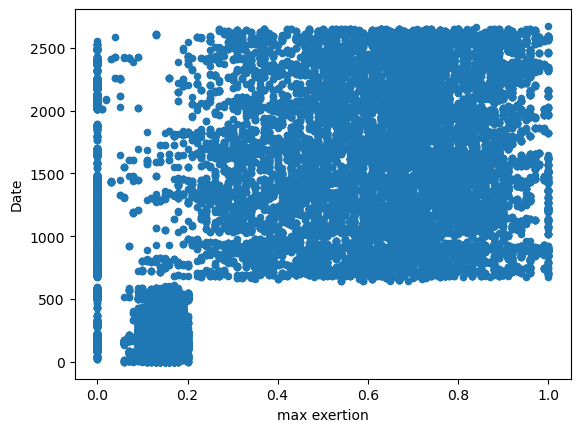

In [17]:
week_ds.plot(kind='scatter', x='max exertion', y='Date')

In [14]:
#get the number of missing data points per column
missing_values_count = day_ds.isnull().sum()
missing_values_count

nr. sessions                   0
total km                       0
km Z3-4                        0
km Z5-T1-T2                    0
km sprinting                   0
                              ..
perceived trainingSuccess.6    0
perceived recovery.6           0
Athlete ID                     0
injury                         0
Date                           0
Length: 73, dtype: int64

In [15]:
#get the number of missing data points per column
missing_values_count = week_ds.isnull().sum()
missing_values_count

nr. sessions               0
nr. rest days              0
total kms                  0
max km one day             0
total km Z3-Z4-Z5-T1-T2    0
                          ..
injury                     0
rel total kms week 0_1     0
rel total kms week 0_2     0
rel total kms week 1_2     0
Date                       0
Length: 72, dtype: int64

In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 424829093205019488
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5671747584
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16164555492905696902
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


In [28]:
week_ds[['Athlete ID', 'Date']].groupby('Athlete ID').describe() # looks like there are gaps in the Dates for all the athletes

Date                                                             \
             count         mean         std     min      25%     50%      75%   
Athlete ID                                                                      
0            310.0   157.122581   96.110160     0.0    77.25   154.5   231.75   
1            461.0   258.943601  192.768100     0.0   115.00   230.0   345.00   
2           1291.0   822.561580  484.371439     0.0   368.50   887.0  1252.50   
3            344.0   214.781977  162.391643     0.0    85.75   171.5   343.25   
4            681.0   529.609398  410.207412     0.0   170.00   383.0   921.00   
...            ...          ...         ...     ...      ...     ...      ...   
69           313.0  2471.795527  119.808647  2121.0  2354.00  2496.0  2574.00   
70           327.0  2354.623853  141.605742  2101.0  2229.50  2369.0  2450.50   
71           392.0  2386.739796  150.178985  2101.0  2247.75  2388.5  2529.25   
72           216.0  2544.500000   62.498000  2437.0  2490.75  2544.5  2598.25   
73           192.0  2556.500000   55.569776  2461.0  2508.75  2556.5  2604.25   

                    
               max  
Athlete ID          
0            528.0  
1            765.0  
2           1624.0  
3            547.0  
4           1589.0  
...            ...  
69          2652.0  
70          2641.0  
71          2673.0  
72          2652.0  
73          2652.0  

[74 rows x 8 columns]

<Axes: xlabel='Date'>

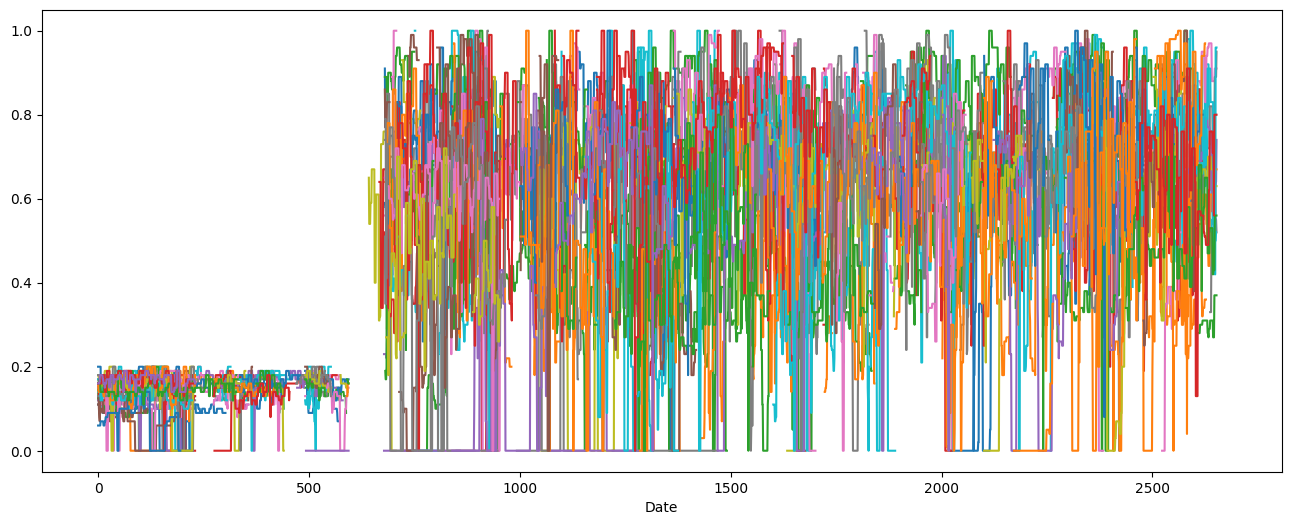

In [37]:
week_ds.pivot(index='Date', columns='Athlete ID', values='max exertion').plot(legend=False, figsize=[16, 6])

In [45]:
week_ds[(week_ds['injury']>0)].head(20)

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
42223,6.0,1.0,34.9,14.5,10.4,0.0,2.0,9.5,5.0,0.0,...,0.00,0.18,0.17,0.18,0,1,0.925729,9.432430,10.189186,324
42224,6.0,1.0,33.6,15.2,15.3,1.0,2.0,12.4,6.4,1.8,...,0.00,0.18,0.17,0.18,0,1,0.629213,0.968300,1.538905,353
42225,1.0,6.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.18,0.18,0.18,0,1,0.424242,1.076923,2.538461,386
42226,7.0,0.0,47.2,12.5,14.7,0.0,3.0,14.0,6.0,0.0,...,0.00,0.17,0.15,0.18,0,1,0.810997,1.053571,1.299107,413
42227,9.0,1.0,29.4,7.5,3.9,3.0,3.0,0.0,0.0,2.5,...,0.00,0.18,0.17,0.18,0,1,0.794595,1.017301,1.280277,461
42228,7.0,0.0,28.5,6.9,10.8,1.0,4.0,10.0,4.5,0.8,...,0.00,0.17,0.16,0.17,0,1,1.619318,0.823699,0.508671,490
42229,3.0,4.0,23.4,12.0,1.9,1.0,2.0,1.5,1.5,0.4,...,0.00,0.17,0.17,0.18,0,1,0.570732,1.292818,2.265193,528
42230,6.0,1.0,117.0,22.0,20.0,0.0,2.0,20.0,11.0,0.0,...,0.80,0.35,0.19,0.48,1,1,1.285714,1.206186,0.938144,672
42231,6.0,1.0,114.0,30.0,10.0,1.0,1.0,0.0,0.0,10.0,...,0.89,0.22,0.06,0.46,1,1,0.584615,0.870229,1.488550,765
42232,6.0,2.0,78.0,24.0,15.0,1.0,2.0,9.0,9.0,6.0,...,0.63,0.36,0.36,0.36,2,1,1.054054,6.000000,5.692307,680


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

week_ds=pd.read_csv('week_approach_maskedID_timeseries.csv')
# Load the dataset from CSV and sort it by Date then Athlete ID
df = week_ds.sort_values(by=['Date', 'Athlete ID'])

# Use all features except 'injury' as input
input_data = df.drop(columns=['injury']).values

# Normalize the input data using z score scaling (optional but recommended)
input_data = (input_data - np.mean(input_data, axis=0)) / np.std(input_data, axis=0)

# Use 'injury' column as the target variable y
y = df['injury'].values

# Reshape the input data for LSTM (batches, timesteps, features)
x_tf = input_data.reshape(input_data.shape[0], 1, input_data.shape[1])
y_tf = y

# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x_tf, y_tf, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Define and compile the LSTM model
model = Sequential([
    LSTM(units=64), # input_shape=(x_train.shape[1], x_train.shape[2])
    Dense(units=1, activation='sigmoid')  # Output layer for binary classification (sigmoid activation)
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, verbose=1)

# Evaluate the model on test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Save the trained model
model.save('trained_model.keras')


Num GPUs Available:  0
Epoch 1/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9701 - loss: 0.1511 - val_accuracy: 0.9862 - val_loss: 0.0736
Epoch 2/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.9861 - loss: 0.0721 - val_accuracy: 0.9862 - val_loss: 0.0736
Epoch 3/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.9867 - loss: 0.0661 - val_accuracy: 0.9862 - val_loss: 0.0724
Epoch 4/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.9874 - loss: 0.0614 - val_accuracy: 0.9862 - val_loss: 0.0731
Epoch 5/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.9872 - loss: 0.0605 - val_accuracy: 0.9862 - val_loss: 0.0746
Epoch 6/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.9868 - loss: 0.0599 - val_accuracy: 0.9862 - val_loss: 0.0741
Epoch 7/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.9875 - loss: 0.0551 - val_accuracy: 0.9862 - val_loss: 0.0741
Epoch 8/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 1s 82

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

df=pd.read_csv('week_approach_maskedID_timeseries.csv')

# Use all features except 'injury' as input
input_data = df.drop(columns=['injury']).values

# Normalize the input data using z score scaling (optional but recommended)
input_data = (input_data - np.mean(input_data, axis=0)) / np.std(input_data, axis=0)

# Use 'injury' column as the target variable y
y = df['injury'].values

x_tf = input_data
y_tf = y

# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x_tf, y_tf, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Define and compile the model
model = Sequential([
    Dense(units=64, activation='relu', name="layer1"),
    Dense(units=1, activation='sigmoid', name="output")  # Output layer for binary classification (sigmoid activation)
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, verbose=1)

# Evaluate the model on test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Save the trained model
model.save('trained_model_2.keras')


Num GPUs Available:  0
Epoch 1/100
1070/1070 [==============================] - 1s 985us/step - loss: 0.0811 - accuracy: 0.9858 - val_loss: 0.0635 - val_accuracy: 0.9886
Epoch 2/100
1070/1070 [==============================] - 1s 925us/step - loss: 0.0718 - accuracy: 0.9863 - val_loss: 0.0649 - val_accuracy: 0.9886
Epoch 3/100
1070/1070 [==============================] - 1s 943us/step - loss: 0.0699 - accuracy: 0.9863 - val_loss: 0.0638 - val_accuracy: 0.9886
Epoch 4/100
1070/1070 [==============================] - 1s 947us/step - loss: 0.0685 - accuracy: 0.9863 - val_loss: 0.0622 - val_accuracy: 0.9886
Epoch 5/100
1070/1070 [==============================] - 1s 980us/step - loss: 0.0669 - accuracy: 0.9864 - val_loss: 0.0623 - val_accuracy: 0.9886
Epoch 6/100
1070/1070 [==============================] - 1s 965us/step - loss: 0.0660 - accuracy: 0.9863 - val_loss: 0.0638 - val_accuracy: 0.9886
Epoch 7/100
1070/1070 [==============================] - 1s 1ms/step - loss: 0.0648 - accuracy:

ImportError: `save_model()` using h5 format requires h5py. Could not import h5py.